# Applying the CRISP-DM Method to a Business Problem

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>




The mobile pricing prediction classification dataset contains data on various mobile phones, their technical features, and pricing categories. It is used to predict the price range of a mobile device based on its specifications.

Description of columns:

* **battery_power**: Battery capacity in mAh  
* **blue**: Has Bluetooth or not (0 = No, 1 = Yes)  
* **clock_speed**: Processor speed in GHz  
* **dual_sim**: Has dual SIM support or not (0 = No, 1 = Yes)  
* **fc**: Front camera megapixels  
* **four_g**: Has 4G support or not (0 = No, 1 = Yes)  
* **int_memory**: Internal memory in GB  
* **m_deep**: Mobile depth in cm  
* **mobile_wt**: Weight of the mobile in grams  
* **n_cores**: Number of processor cores  
* **pc**: Primary camera megapixels  
* **px_height**: Pixel resolution height  
* **px_width**: Pixel resolution width  
* **ram**: RAM in MB  
* **sc_h**: Screen height in cm  
* **sc_w**: Screen width in cm  
* **talk_time**: Time a single battery charge will last (in hours)  
* **three_g**: Has 3G support or not (0 = No, 1 = Yes)  
* **touch_screen**: Has touch screen or not (0 = No, 1 = Yes)  
* **wifi**: Has WiFi support or not (0 = No, 1 = Yes)  
* **price_range**: Target variable (mobile price category)  



Integer Classification of the mobile pricing types:
* 0 = Low cost

* 1 = Medium cost

* 2 = High cost

* 3 = Very high cost

 ## 1.1 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

* Does the model correctly distinguish among mobile price categories and classify them correctly?

### 1.2 Success metrics

* Accuracy greater than 80%  on a  test set.

* Consistent performance across all 4 categories on a test set.

* No single class with accuracy below 70%. on a test set



# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>


## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Initial data collection report -


In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install scikit-learn
!pip install prince
!pip install scipy
!pip install keras
!pip install keras_tuner
!pip install scikeras

In [ ]:
# Data manipulation
import pandas as pd
import pandas.api.types as pdtypes
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots render inline (for Jupyter/Colab)
%matplotlib inline

# Machine learning - preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin

# Machine learning - models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Model selection
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, accuracy_score

# Statistics
from scipy.stats import uniform

# Dimensionality reduction / visualization
import umap

# Model persistence
import joblib

# Parallel execution
from concurrent.futures import ThreadPoolExecutor, as_completed

# Google Colab
from google.colab import drive


# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer

# Keras Tuner
import keras_tuner as kt

# Scikit-learn Keras wrapper
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping



In [ ]:
plt.style.use('bmh')
pd.set_option('display.max_columns', 40)
pd.set_option("display.max_colwidth", None)


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/My Drive/Colab Notebooks/Unified Mentor Projects/Datasets/Mobile Phone Pricing/dataset.csv"


In [ ]:
df=pd.read_csv(dataset_path)

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
y=df["price_range"]
X=df.drop("price_range",axis=1)
test_size= 0.3
random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)


X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=random_state)

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>


### Variables description

| Variable       | Description                                                   | Type (Feature)            |
|----------------|---------------------------------------------------------------|---------------------------|
| battery_power  | Battery capacity in mAh                                       | Numerical (Continuous)    |
| blue           | Has Bluetooth or not (0 = No, 1 = Yes)                        | Categorical (Binary)      |
| clock_speed    | Processor speed in GHz                                        | Numerical (Continuous)    |
| dual_sim       | Has dual SIM support or not (0 = No, 1 = Yes)                 | Categorical (Binary)      |
| fc             | Front camera megapixels                                       | Numerical (Discrete)      |
| four_g         | Has 4G support or not (0 = No, 1 = Yes)                       | Categorical (Binary)      |
| int_memory     | Internal memory in GB                                         | Numerical (Discrete)      |
| m_deep         | Mobile depth in cm                                            | Numerical (Continuous)    |
| mobile_wt      | Weight of the mobile in grams                                 | Numerical (Continuous)    |
| n_cores        | Number of processor cores                                     | Numerical (Discrete)      |
| pc             | Primary camera megapixels                                     | Numerical (Discrete)      |
| px_height      | Pixel resolution height                                       | Numerical (Discrete)      |
| px_width       | Pixel resolution width                                        | Numerical (Discrete)      |
| ram            | RAM in MB                                                     | Numerical (Continuous)    |
| sc_h           | Screen height in cm                                           | Numerical (Continuous)    |
| sc_w           | Screen width in cm                                            | Numerical (Continuous)    |
| talk_time      | Time a single battery charge will last (in hours)             | Numerical (Continuous)    |
| three_g        | Has 3G support or not (0 = No, 1 = Yes)                       | Categorical (Binary)      |
| touch_screen   | Has touch screen or not (0 = No, 1 = Yes)                     | Categorical (Binary)      |
| wifi           | Has WiFi support or not (0 = No, 1 = Yes)                     | Categorical (Binary)      |
| price_range    | Mobile price category: 0=Low, 1=Medium, 2=High, 3=Very High   | Categorical (Ordinal)     |


In [ ]:
X_train.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
215,1987,1,0.5,0,3,1,53,1.0,181,3,7,1052,1516,3117,18,5,8,1,1,1
313,645,0,1.2,0,6,1,41,0.7,184,8,17,741,1130,714,18,2,13,1,1,0
319,1097,0,2.1,1,6,0,64,0.2,161,3,8,419,1914,1725,14,5,9,1,0,1
1365,1318,0,1.9,1,0,1,11,0.8,188,2,15,688,1591,1780,12,10,2,1,0,0
729,1135,1,2.8,1,9,0,43,0.4,158,1,11,690,1589,3204,18,13,6,1,0,0
1961,672,1,0.6,1,13,0,61,0.1,194,5,20,724,1127,1457,14,10,20,1,0,1
1430,1672,1,1.7,1,1,1,44,0.5,172,8,4,1250,1435,1348,11,6,7,1,1,1
1217,1451,1,0.5,0,5,1,57,0.6,181,8,12,812,1456,3038,15,7,18,1,0,1
93,879,1,2.5,0,11,1,14,0.7,83,6,15,403,1105,349,16,10,2,1,0,1
1275,1733,1,1.5,1,4,1,6,0.9,170,1,15,590,997,3488,6,4,10,1,1,1


In [ ]:
X_train.shape

(1400, 20)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 836 to 1126
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   blue           1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_scree

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1400 entries, 836 to 1126
Series name: price_range
Non-Null Count  Dtype
--------------  -----
1400 non-null   int64
dtypes: int64(1)
memory usage: 21.9 KB


In [ ]:
cover_counts = y_train.value_counts().sort_index()

# Calculate percentages
cover_percentages = (cover_counts / len(y_train)) * 100

# Display counts DataFrame
counts_df = pd.DataFrame({
    'Cover Type': cover_counts.index,
    'Count': cover_counts.values
})

# Display percentages DataFrame
percentages_df = pd.DataFrame({
    'Cover Type': cover_percentages.index,
    'Percentage': cover_percentages.round(2)
})

display(counts_df)
display(percentages_df)

,Cover Type,Count
0,0,349
1,1,354
2,2,352
3,3,345


,Cover Type,Percentage
price_range,,
0,0,24.93
1,1,25.29
2,2,25.14
3,3,24.64


As we can see, X_train has no imbalance.

In [ ]:
# Select categorical columns
categorical_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


# Build a DataFrame with column, number of unique values, and the actual categories
cat_summary = pd.DataFrame({
    "Column": categorical_cols,
    "Num Unique": [X_train[col].nunique() for col in categorical_cols],
    "Categories": [X_train[col].unique().tolist() for col in categorical_cols]
})

display(cat_summary)

,Column,Num Unique,Categories
0,blue,2,"[1, 0]"
1,dual_sim,2,"[1, 0]"
2,four_g,2,"[0, 1]"
3,three_g,2,"[0, 1]"
4,touch_screen,2,"[1, 0]"
5,wifi,2,"[1, 0]"


### Numerical variables

Statistics for the numerical columns are:

* **count:** The number of non-null values.

* **mean:** The average.

* **std:** The standard deviation, which measures the dispersion of the data.

* **min:** The minimum value.

* **25%:** The first quartile (25th percentile).

* **50%:** The median (50th percentile).

* **75%:** The third quartile (75th percentile).

* **max:** The maximum value.

In [ ]:
X_train.select_dtypes(include=["int64","float64"]).drop(categorical_cols,axis=1).describe().round(2)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00,1400.00
mean,1240.34,1.53,4.27,32.24,0.51,140.64,4.57,9.90,639.42,1246.35,2122.59,12.18,5.65,10.95
std,443.07,0.83,4.32,18.26,0.29,35.33,2.30,6.02,439.95,430.39,1082.68,4.22,4.36,5.49
min,501.00,0.50,0.00,2.00,0.10,80.00,1.00,0.00,0.00,500.00,258.00,5.00,0.00,2.00
25%,852.00,0.70,1.00,16.00,0.20,109.00,3.00,5.00,283.25,872.75,1214.00,9.00,2.00,6.00
50%,1229.00,1.50,3.00,32.00,0.50,141.00,5.00,10.00,553.00,1235.00,2119.50,12.00,5.00,11.00
75%,1625.50,2.30,7.00,48.00,0.80,171.00,7.00,15.00,942.00,1617.00,3056.25,16.00,8.00,16.00
max,1998.00,3.00,19.00,64.00,1.00,200.00,8.00,20.00,1949.00,1998.00,3998.00,19.00,18.00,20.00


Several features like front camera and pixel height show clear right-skewness, while battery and RAM are more symmetric. The data is generally non-normal with notable outliers in resolution metrics.

### Categorical variables

* **count:** The number of non-null values.

* **unique:** The number of unique values in the column.

* **top:** The most frequent value in the column.

* **freq:** The frequency (number of occurrences) of the most frequent value.

In [ ]:
X_train[categorical_cols].describe().round(2)

,blue,dual_sim,four_g,three_g,touch_screen,wifi
count,1400.00,1400.00,1400.00,1400.00,1400.0,1400.0
mean,0.49,0.52,0.53,0.76,0.5,0.5
std,0.50,0.50,0.50,0.42,0.5,0.5
min,0.00,0.00,0.00,0.00,0.0,0.0
25%,0.00,0.00,0.00,1.00,0.0,0.0
50%,0.00,1.00,1.00,1.00,1.0,0.0
75%,1.00,1.00,1.00,1.00,1.0,1.0
max,1.00,1.00,1.00,1.00,1.0,1.0


Standard summary statistics (mean, std, percentiles) are not reliable for these binary indicators.

## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>



### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>


In [ ]:
X_train.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = (100 * df.isnull().sum()) / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(X_train)

Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>


### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>




In [ ]:

def plot_target_distribution(X_df, y_series, target_name="price_range"):
    """Plots the distribution of the target variable."""
    # Combine X and y for plotting
    df_local = X_df.copy()
    df_local[target_name] = y_series


    fig, ax = plt.subplots(figsize=(5, 4))

    sns.countplot(x=target_name, data=df_local, ax=ax)

    # Add labels to each bar
    for bar in ax.patches:
        height = bar.get_height()
        width = bar.get_width()
        x = bar.get_x()
        y = bar.get_y()

        label_text = height
        label_x = x + width / 2
        label_y = y + height / 2

        ax.text(label_x, label_y, f"{label_text:,.1f}", ha="center", va="center")

    ax.set_title(f"{target_name} Distribution")

    plt.show()


def plot_numeric_boxplots(X_df, y_series, target="price_range", n_cols=3):
    df_local = X_df.copy()
    df_local[target] = y_series


    numeric_cols = df_local.select_dtypes(include=["int64","float64"]).drop(columns=categorical_cols + [target], errors='ignore').columns


    n_rows = int(np.ceil(len(numeric_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=target, y=col, data=df_local, ax=axes[i])
        axes[i].set_title(f"{col} vs {target}")

    # Remove unused subplots
    for j in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



def plot_categorical_stacked(X_df, y_series, target="price_range", n_cols=3):
    df_local = X_df.copy()
    df_local[target] = y_series


    n_rows = int(np.ceil(len(categorical_cols) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        cross_tab = pd.crosstab(df_local[col], df_local[target], normalize='index')*100  # FIXED: use df_local
        cross_tab.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_ylabel("Percentage")
        axes[i].set_title(f"{col} vs {target}")
        axes[i].legend(title=target)


    plt.tight_layout()
    plt.show()

def plot_numeric_correlation(X_df, y_series, target="price_range"):

    # Combine X and y for plotting
    df_local = X_df.copy()
    df_local[target] = y_series


    numeric_cols = df_local.drop(categorical_cols,axis=1).columns

    fig= plt.figure(figsize=(8,6))
    corr = df_local[numeric_cols.tolist()].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Numerical Variables)")
    plt.show()


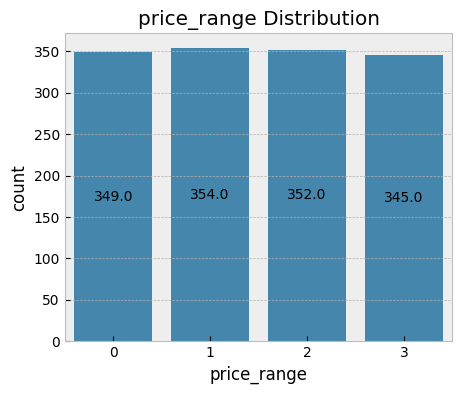

In [ ]:
plot_target_distribution(X_df=X_train, y_series=y_train)

The dataset shows moderate variation but no critical class imbalance. Standard modeling approaches can be applied without mandatory imbalance correction.

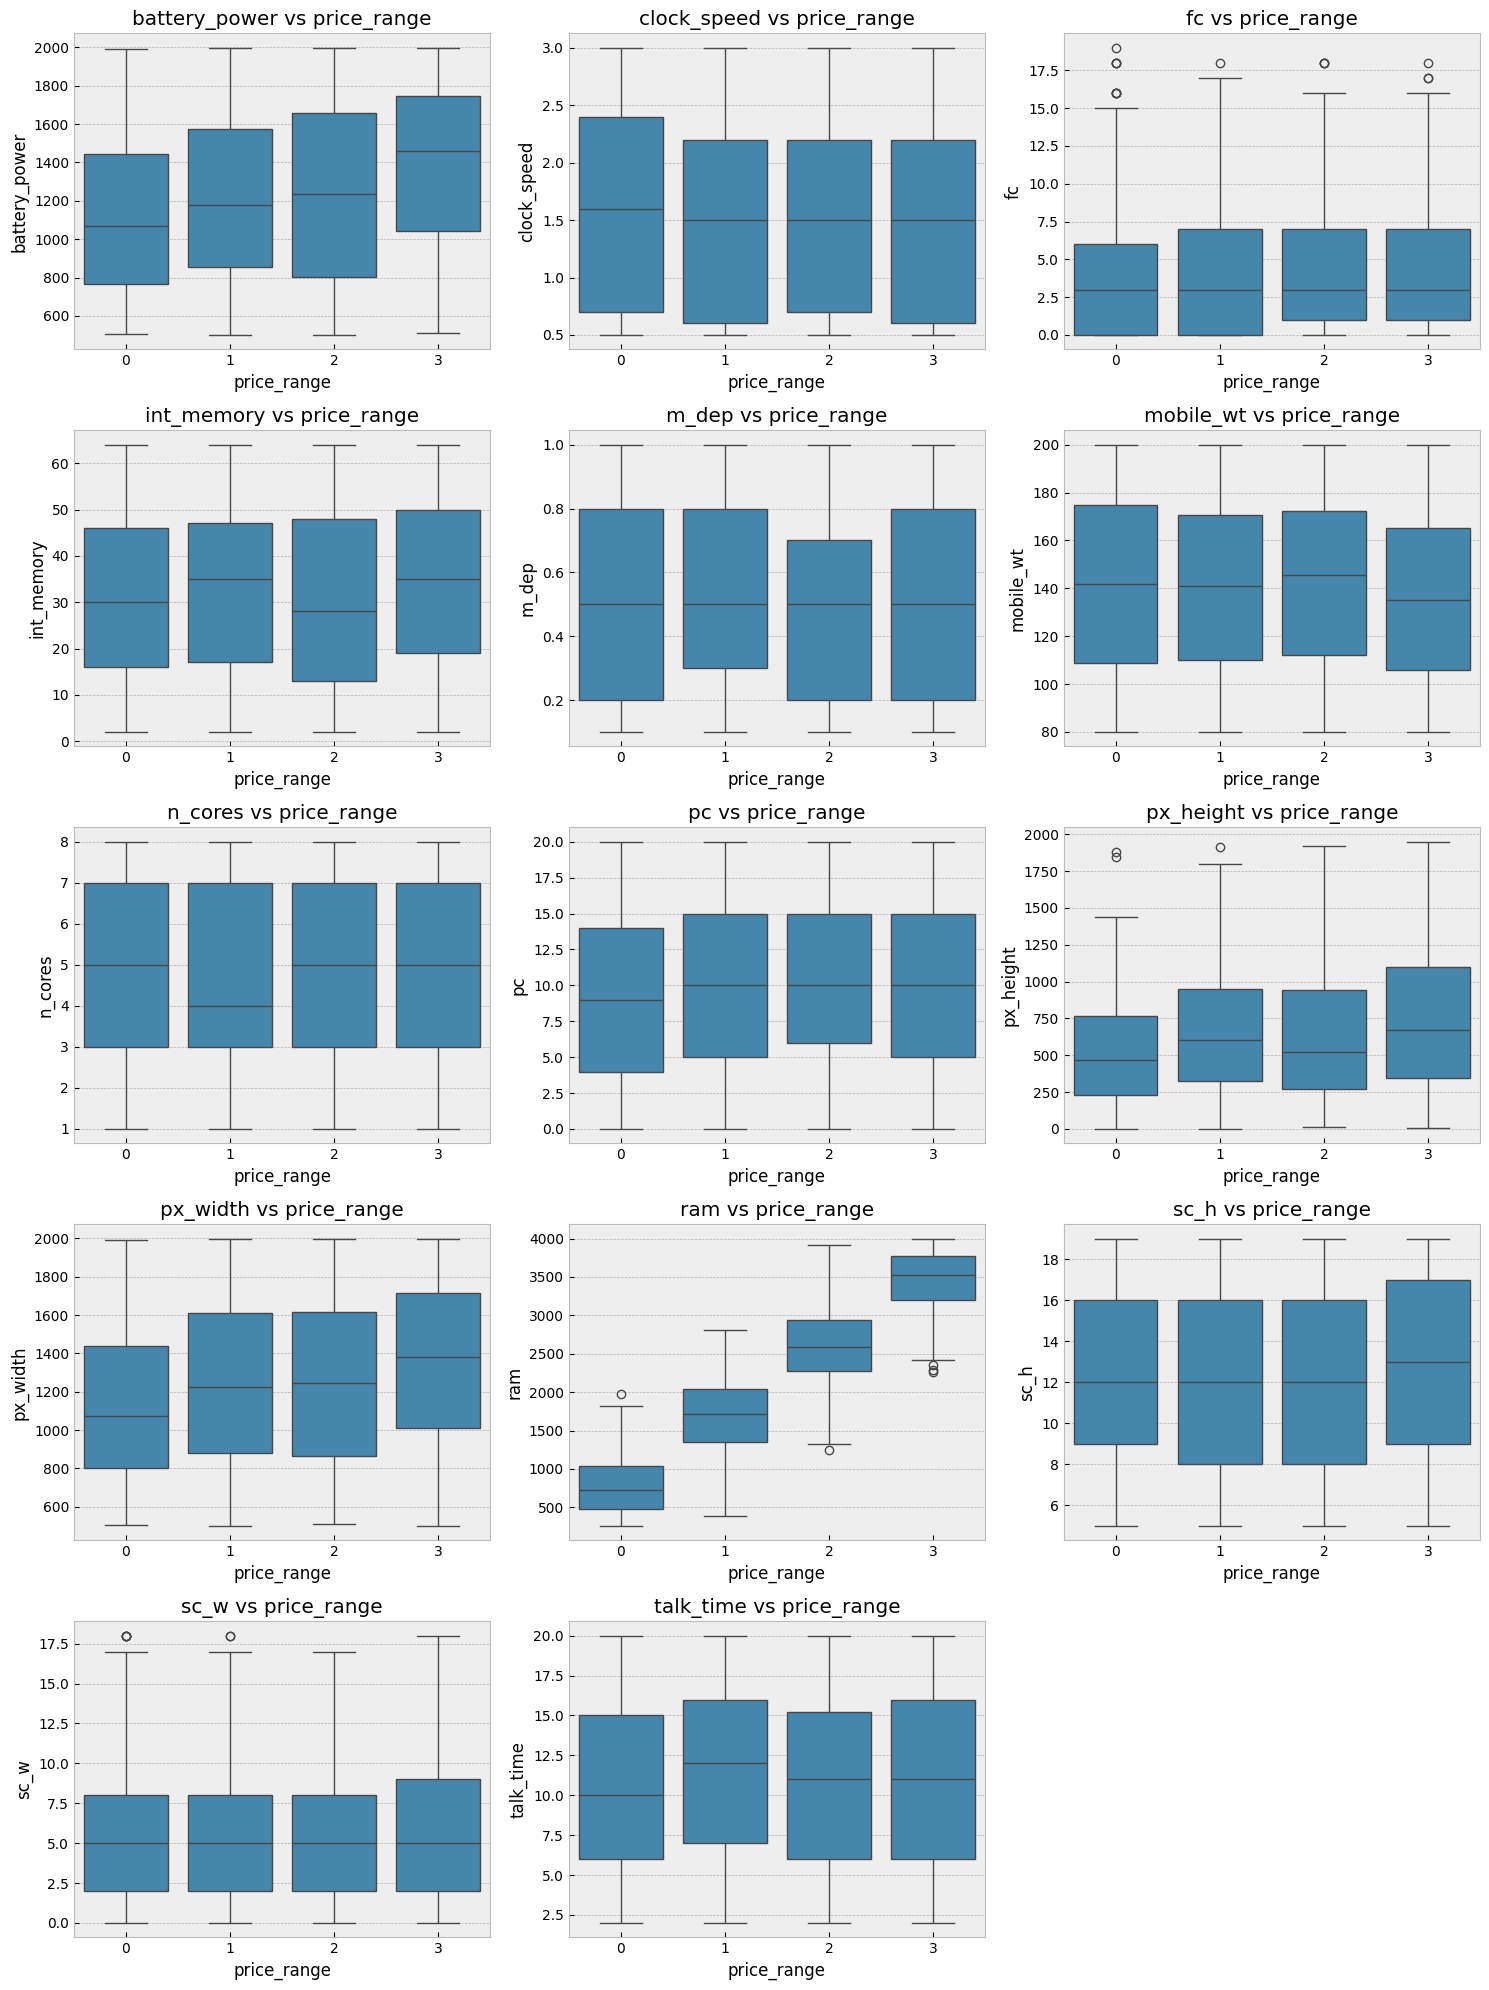

In [ ]:
boxplot_graphs=plot_numeric_boxplots(X_df=X_train, y_series=y_train)



Some features show clear variations across price ranges, indicating good predictive potential. Outliers are present and should be addressed in subsequent preprocessing.

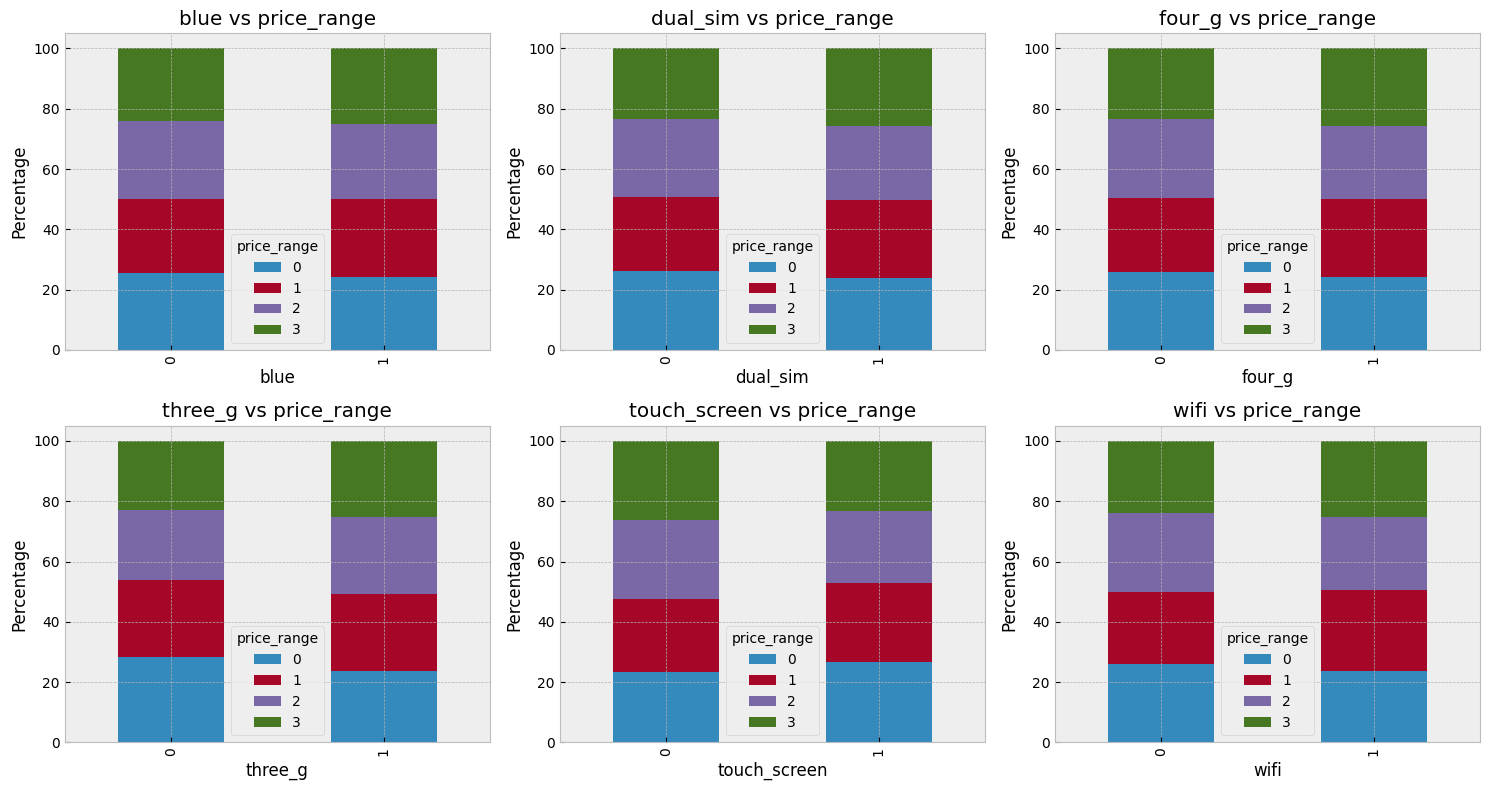

In [ ]:
categorical_graphs=plot_categorical_stacked(X_df=X_train, y_series=y_train)



 Most variables are slightly more  associated with just 1-2 specific price ranges, making them highly predictive.

### 2.4.4 Correlations  <a class="anchor" id="Correlations"></a>


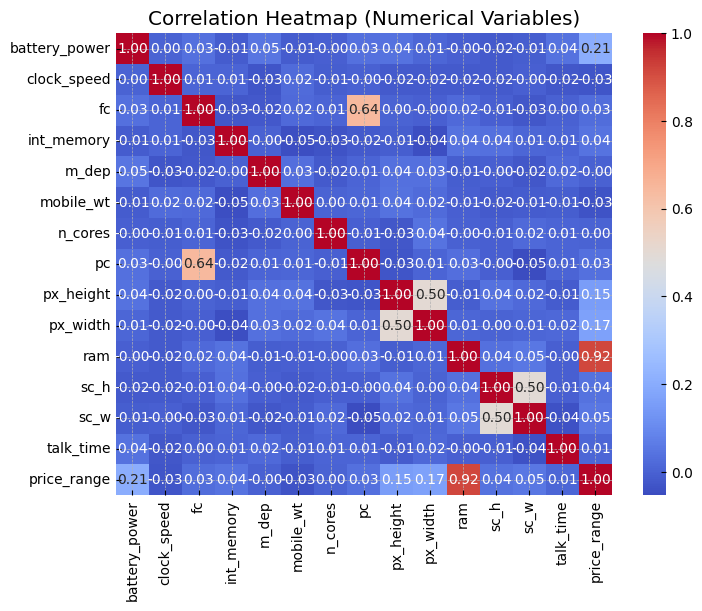

In [ ]:
plot_numeric_correlation(X_df=X_train, y_series=y_train)


Most features show weak linear correlation with price_range, suggesting complex relationships. Moreover, strong feature correlations exist, particularly in price_range and ram and pc with fc, indicating potential multicollinearity.

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>


**Section summary:**
From this information, we can already see that there are no null values. Furthermore, we can see many one-hot encoded variables, which we will not remove due to their inherent importance.

Notes:

* To prevent multicollinearity, if a pair of variables has a correlation of ≥ 60%, one of them will be removed (the target variable will not be considered).




# 3. Stage Three - Data Preparation <a class="anchor" id="Datapreperation"></a>


## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>


### 3.2.1 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>



In [ ]:
X_train=X_train.drop(["pc","fc","sc_w"],axis=1)
X_test=X_test.drop(["pc","fc","sc_w"],axis=1)
X_val=X_val.drop(["pc","fc","sc_w"],axis=1)


We removed pc (primary camera) because it is highly redundant with fc (front camera), and remove sc_w (screen width) because it is highly redundant with sc_h (screen height). This eliminates multicollinearity while preserving the most critical feature, ram, which has a near-perfect 0.92 correlation with our target, price_range.

### 3.2.2 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>









In [ ]:
X_train.shape

(1400, 17)

In [ ]:
X_test.shape

(300, 17)

In [ ]:
mask = ~X_train.duplicated(keep='first')   # True for rows to keep
X_train = X_train[mask].reset_index(drop=True)
y_train = y_train[mask].reset_index(drop=True)


mask_test = ~X_test.duplicated(keep='first')   # True for rows to keep
X_test = X_test[mask_test].reset_index(drop=True)
y_test = y_test[mask_test].reset_index(drop=True)


mask_test = ~X_val.duplicated(keep='first')   # True for rows to keep
X_val = X_val[mask_test].reset_index(drop=True)
y_val = y_val[mask_test].reset_index(drop=True)

In [ ]:
X_train.shape

(1400, 17)

In [ ]:
X_test.shape

(300, 17)

**Note:** Outliers removal and normalization process will be made in the following steps.

# 4. Stage Four - Modelling <a class="anchor" id="Modelling"></a>



## 4.1.Modeling Approach & Assumptions<a class="anchor" id="ModellingAssumptions"></a>



**Dense Neural Network**

Assumes that nonlinear interactions between mobile specifications,such as RAM, processor speed, camera quality, and battery capacity—can be learned through multiple dense layers. Each layer captures increasingly complex feature relationships (e.g., how RAM and processor speed together influence price). It can model intricate dependencies across both continuous and binary inputs but requires proper normalization, sufficient data, and regularization (like dropout) to avoid overfitting.

## 4.2. Model development <a class="anchor" id="BuildModel"></a>


The cleaning process applies several transformations to prepare the dataset for modeling. First, missing values are imputed using class-specific medians for numerical features or modes for categorical ones. Finally, numeric outliers are capped within interquartile-based bounds, ensuring the dataset is standardized, and ready for encoding and model training.

Note: StandardScaler must be applied for Support Vector Machines due to its distance-based kernel calculations, but is optional for tree-based models like Random Forest and Gradient Boosting.

In [ ]:
class OutlierCapper(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
        self.bounds_ = {}

    def fit(self, X, y=None):
        X_df = pd.DataFrame(X).copy()
        for col in X_df.select_dtypes(include=np.number).columns:
            Q1 = X_df[col].quantile(0.25)
            Q3 = X_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - self.factor * IQR
            upper = Q3 + self.factor * IQR
            self.bounds_[col] = (lower, upper)
        return self

    def transform(self, X):
        X_df = pd.DataFrame(X).copy()
        for col, (lower, upper) in self.bounds_.items():
            X_df[col] = np.clip(X_df[col], lower, upper)  # cap
        return X_df

In [ ]:
class ClassImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.impute_values_ = {}
        self.global_values_ = {}
        self.is_fitted_ = False
        self.column_names_ = None

    def fit(self, X, y=None):
        # Ensure DataFrame
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        if not isinstance(y, pd.Series):
            y = pd.Series(y)

        self.column_names_ = X.columns.tolist()
        self.impute_values_.clear()
        self.global_values_.clear()

        for col in X.columns:
            self.impute_values_[col] = {}

            if  X[col].dtype == np.int64 or X[col].dtype == np.float64:

                # per-class median
                for cls in y.unique():
                    self.impute_values_[col][cls] = X.loc[y == cls, col].median()
                self.global_values_[col] = X[col].median()
            else:
                # per-class mode
                for cls in y.unique():
                    self.impute_values_[col][cls] = X.loc[y == cls, col].mode()[0]
                self.global_values_[col] = X[col].mode()[0]

        self.is_fitted_ = True
        return self

    def transform(self, X, y=None):
        if not self.is_fitted_:
            raise RuntimeError("You must fit the imputer before calling transform.")

        # Ensure DataFrame with same column names
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.column_names_)

        X = X.copy()

        if y is not None:
            # Ensure alignment by position, not index
            y = np.asarray(y).ravel()
            for i, col in enumerate(self.column_names_):
                for cls in np.unique(y):
                    mask = (y == cls) & (X[col].isna().to_numpy())
                    if pd.api.types.is_integer_dtype(X[col].dtype):
                      X.loc[mask, col] = int(self.impute_values_[col][cls])
                    else:
                      X.loc[mask, col] = self.impute_values_[col][cls]
        else:
            # Test-time: use global values
            for col in self.column_names_:
                X[col] = X[col].fillna(self.global_values_[col])

        return X

### 4.2.1 Keras tuner (Find the best model for my dataset)

In [ ]:

# Preprocessing pipeline

numerical_cols=X_train.select_dtypes(include=["int64","float64"]).drop(categorical_cols,axis=1).columns
preprocessing_pipeline = Pipeline([
    ("imputer", ClassImputer()),
    ("outlier", OutlierCapper()),
    ("preprocessor", ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', 'passthrough', categorical_cols)
    ]))
])

# Apply preprocessing
X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_val_processed = preprocessing_pipeline.transform(X_val)
X_test_processed = preprocessing_pipeline.transform(X_test)





In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(layers.InputLayer(shape=(X_train_processed.shape[1],)))
    model.add(layers.Flatten())

    for i in range(hp.Int("num_layers", 2, 4)):
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                activation=hp.Choice("activation", ["relu"]),
                kernel_regularizer=keras.regularizers.l1_l2(
                    l1=hp.Choice(f"l1_{i}", [0.0, 0.01, 0.001]),
                    l2=hp.Choice(f"l2_{i}", [0.0, 0.01, 0.001])
                )
            )
        )

    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=0.3))

    model.add(layers.Dense(4, activation="softmax"))

    learning_rate = hp.Float("lr", min_value=0.001, max_value=0.01, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],

    )
    return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
     overwrite=False,
    directory="Models",
    #project_name="helloworld",
)

# Find best hyperparameters
tuner.search(X_train_processed, y_train,
             validation_data=(X_val_processed, y_val),
             epochs=10,
             callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),tf.keras.callbacks.TensorBoard('my_dir')]
             )

Reloading Tuner from Models/untitled_project/tuner0.json


In [ ]:
# Get best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

In [ ]:
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 288)            │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,564 (56.89 KB)

 Trainable params: 14,564 (56.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define KerasModelWrapper
class KerasModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, best_hps, epochs=10, batch_size=32):  # Match tuner settings
        self.best_hps = best_hps
        self.epochs = epochs
        self.batch_size = batch_size
        self.model_ = None
        self.history_ = None

    def fit(self, X, y, **kwargs):
        self.model_ = tuner.hypermodel.build(self.best_hps)
        validation_data = kwargs.get('validation_data', None)

        history = self.model_.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_data=validation_data,
            callbacks=[EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)],
            verbose=1
        )

        self.history_ = history.history
        return self

    def predict(self, X):
        preds = self.model_.predict(X)
        return preds.argmax(axis=1)

    def predict_proba(self, X):
        return self.model_.predict(X)

In [ ]:
pipeline = Pipeline([
    ("imputer", ClassImputer()),
    ("outlier", OutlierCapper()),
    ("preprocessor", ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', 'passthrough', categorical_cols)
    ])),
    ("classifier", KerasModelWrapper(best_hps, epochs=10, batch_size=32))
])

In [ ]:
pipeline.fit(X_train, y_train, classifier__validation_data=(X_val_processed, y_val))

history = pipeline.named_steps["classifier"].history_


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.3966 - loss: 4.1169 - val_accuracy: 0.8767 - val_loss: 1.4205
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8846 - loss: 1.1585 - val_accuracy: 0.9333 - val_loss: 0.7747
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9226 - loss: 0.7436 - val_accuracy: 0.9567 - val_loss: 0.6476
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9365 - loss: 0.6415 - val_accuracy: 0.9567 - val_loss: 0.5775
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9340 - loss: 0.5797 - val_accuracy: 0.9200 - val_loss: 0.5579
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9414 - loss: 0.5384 - val_accuracy: 0.9333 - val_loss: 0.5048


# 5. Stage five - Model Evaluation <a class="anchor" id="ModelEvaluation"></a>



## 5.1. Model Performance Assessment <a class="anchor" id="Model Performance Assessment"></a>


In [ ]:
def plot_training_history(history,title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy - check if validation accuracy exists
    ax1.plot(history['accuracy'], label='Training accuracy', linewidth=2)
    if 'val_accuracy' in history:
        ax1.plot(history['val_accuracy'], label='Validation accuracy', linewidth=2)
    ax1.set_title(title, fontsize=14)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot loss
    ax2.plot(history['loss'], label='Training Loss', linewidth=2)
    if 'val_loss' in history:
        ax2.plot(history['val_loss'], label='Validation Loss', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

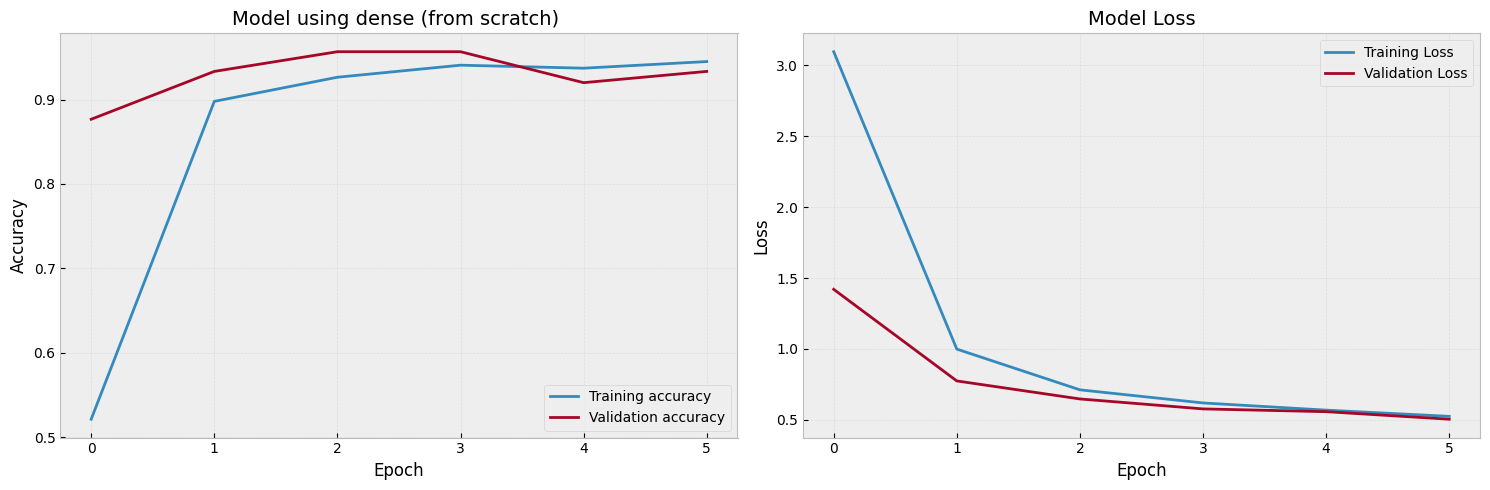

In [ ]:
plot_training_history(history, "Model using dense (from scratch) ")

##5.2 Business Validation

In [ ]:
def plot_confusion_matrix(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3],normalize="true")

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=[0,1,2,3])
  disp.plot(cmap="Blues")
  plt.title("Confusion Matrix")
  plt.show()



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


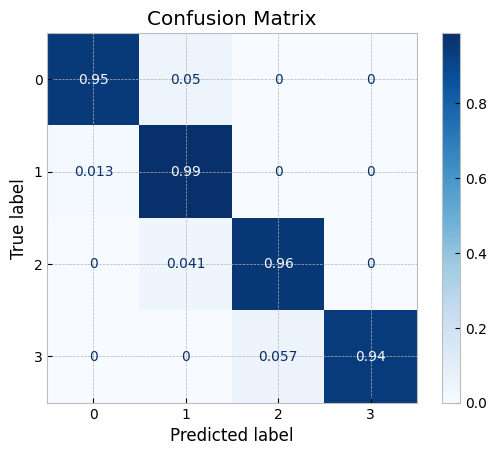

In [ ]:
y_pred=pipeline.predict(X_test)
plot_confusion_matrix(y_test,y_pred)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        80
           1       0.92      0.99      0.95        77
           2       0.95      0.96      0.95        73
           3       1.00      0.94      0.97        70

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



The model meets business constraints.

In [ ]:
joblib.dump(pipeline, f'/content/drive/My Drive/Colab Notebooks/Unified Mentor Projects/Best models/MobilePhonePricing.pkl')

['/content/drive/My Drive/Colab Notebooks/Unified Mentor Projects/Best models/MobilePhonePricing.pkl']

# 6. Stage six - Deployment <a class="anchor" id="Deployment"></a>


Still not implemented